#### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#### Reading the csv file as a dataframe

In [2]:
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

#### Checking the presence of null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
df.isnull().values.sum()

41

In [5]:
df.isnull().values.any()

True

#### We see that there are a few null values in few columns. We are filling those null values with means of the respective column as they are numerical columns

In [6]:
df1 = df.fillna(df.median())

#### Checking again for presence of any more null values

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [8]:
df1.isnull().values.sum()

0

In [9]:
df1.isnull().values.any()

False

#### Checking the shape of the dataframe

In [10]:
df1.shape

(846, 19)

#### Let's look at the description of the numerical columns

In [11]:
df1.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

#### Using boxplots to plot the outliers across different features

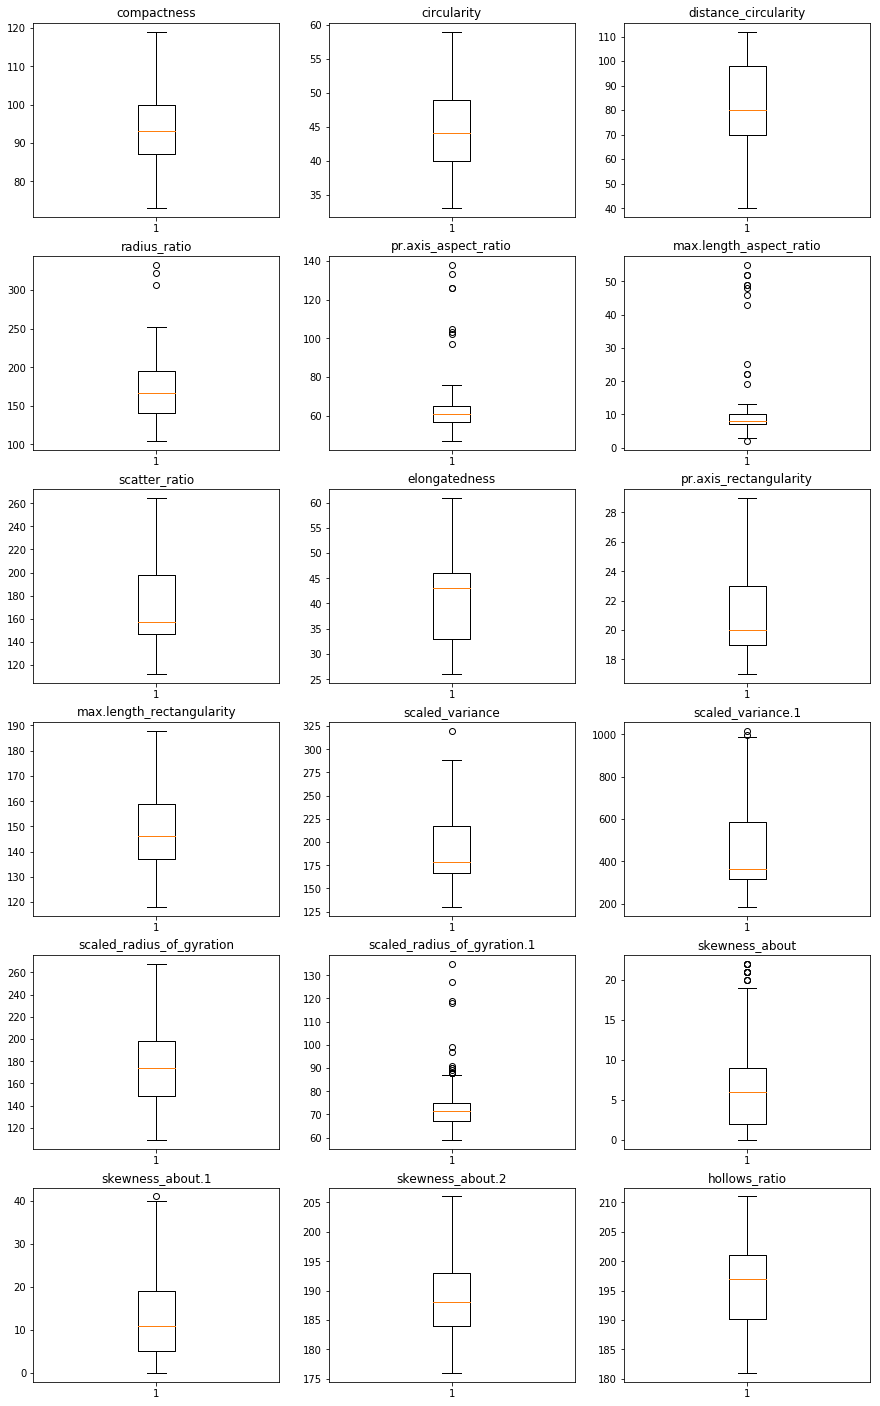

In [12]:
fig, axs = plt.subplots(6, 3, figsize = (15,25))

axs[0, 0].boxplot(df1.compactness)
axs[0, 0].set_title('compactness')

axs[0, 1].boxplot(df1.circularity)
axs[0, 1].set_title('circularity')

axs[0, 2].boxplot(df1.distance_circularity)
axs[0, 2].set_title('distance_circularity')

axs[1, 0].boxplot(df1.radius_ratio)
axs[1, 0].set_title('radius_ratio')

axs[1, 1].boxplot(df1['pr.axis_aspect_ratio'])
axs[1, 1].set_title('pr.axis_aspect_ratio')

axs[1, 2].boxplot(df1['max.length_aspect_ratio'])
axs[1, 2].set_title('max.length_aspect_ratio')

axs[2, 0].boxplot(df1.scatter_ratio)
axs[2, 0].set_title('scatter_ratio')

axs[2, 1].boxplot(df1.elongatedness)
axs[2, 1].set_title('elongatedness')

axs[2, 2].boxplot(df1['pr.axis_rectangularity'])
axs[2, 2].set_title('pr.axis_rectangularity')

axs[3, 0].boxplot(df1['max.length_rectangularity'])
axs[3, 0].set_title('max.length_rectangularity')

axs[3, 1].boxplot(df1.scaled_variance)
axs[3, 1].set_title('scaled_variance')

axs[3, 2].boxplot(df1['scaled_variance.1'])
axs[3, 2].set_title('scaled_variance.1')

axs[4, 0].boxplot(df1.scaled_radius_of_gyration)
axs[4, 0].set_title('scaled_radius_of_gyration')

axs[4, 1].boxplot(df1['scaled_radius_of_gyration.1'])
axs[4, 1].set_title('scaled_radius_of_gyration.1')

axs[4, 2].boxplot(df1.skewness_about)
axs[4, 2].set_title('skewness_about')

axs[5, 0].boxplot(df1['skewness_about.1'])
axs[5, 0].set_title('skewness_about.1')

axs[5, 1].boxplot(df1['skewness_about.2'])
axs[5, 1].set_title('skewness_about.2')

axs[5, 2].boxplot(df1.hollows_ratio)
axs[5, 2].set_title('hollows_ratio')

plt.show()

#### There are a very few ouliers in a few columns, so we can ignore them as of now.

#### Our target column, "class" is now an object column, We need to convert the column to categorical type. Let's use Label Encoder to convert those columns

In [13]:
le = LabelEncoder()
df1['class'] = le.fit_transform(df1['class'])

#### Let's look at the distribution of our target column

In [14]:
df1['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### Let's have a look whether the datatype of the target column changed

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

#### Define X or input varibales or features. We are considering all input features for our first run

In [16]:
X = df1.drop('class', axis = 1)
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

#### Since we are going to work with SVM algorithm which is very much dependent on distance metrics, we need to scale all our columns to remove over and under weightages. We will use Z-score transformation for the same.

In [17]:
X_std = X.apply(zscore)
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

#### Defining our traget variable as y

In [18]:
y = df1['class']
y.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

#### Creating training and test sets

In [19]:
X_train, y_train, X_test, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 11)

#### Instantiating SVM function and fitting it with training data

In [20]:
svm = SVC()
svm.fit(X_train, X_test)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Scoring on training data

In [21]:
svm.score(X_train, X_test)

0.972972972972973

#### Scoring on test data

In [22]:
svm.score(y_train, y_test)

0.9645669291338582

In [23]:
col_names =  ['Model Type', 'Training Score', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

Empty DataFrame
Columns: [Model Type, Training Score, Test Score]
Index: []

In [24]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with all features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

#### We have used all features in the above model, Let's look at the relation between independent attributes and select only those features which do not have interdependencies

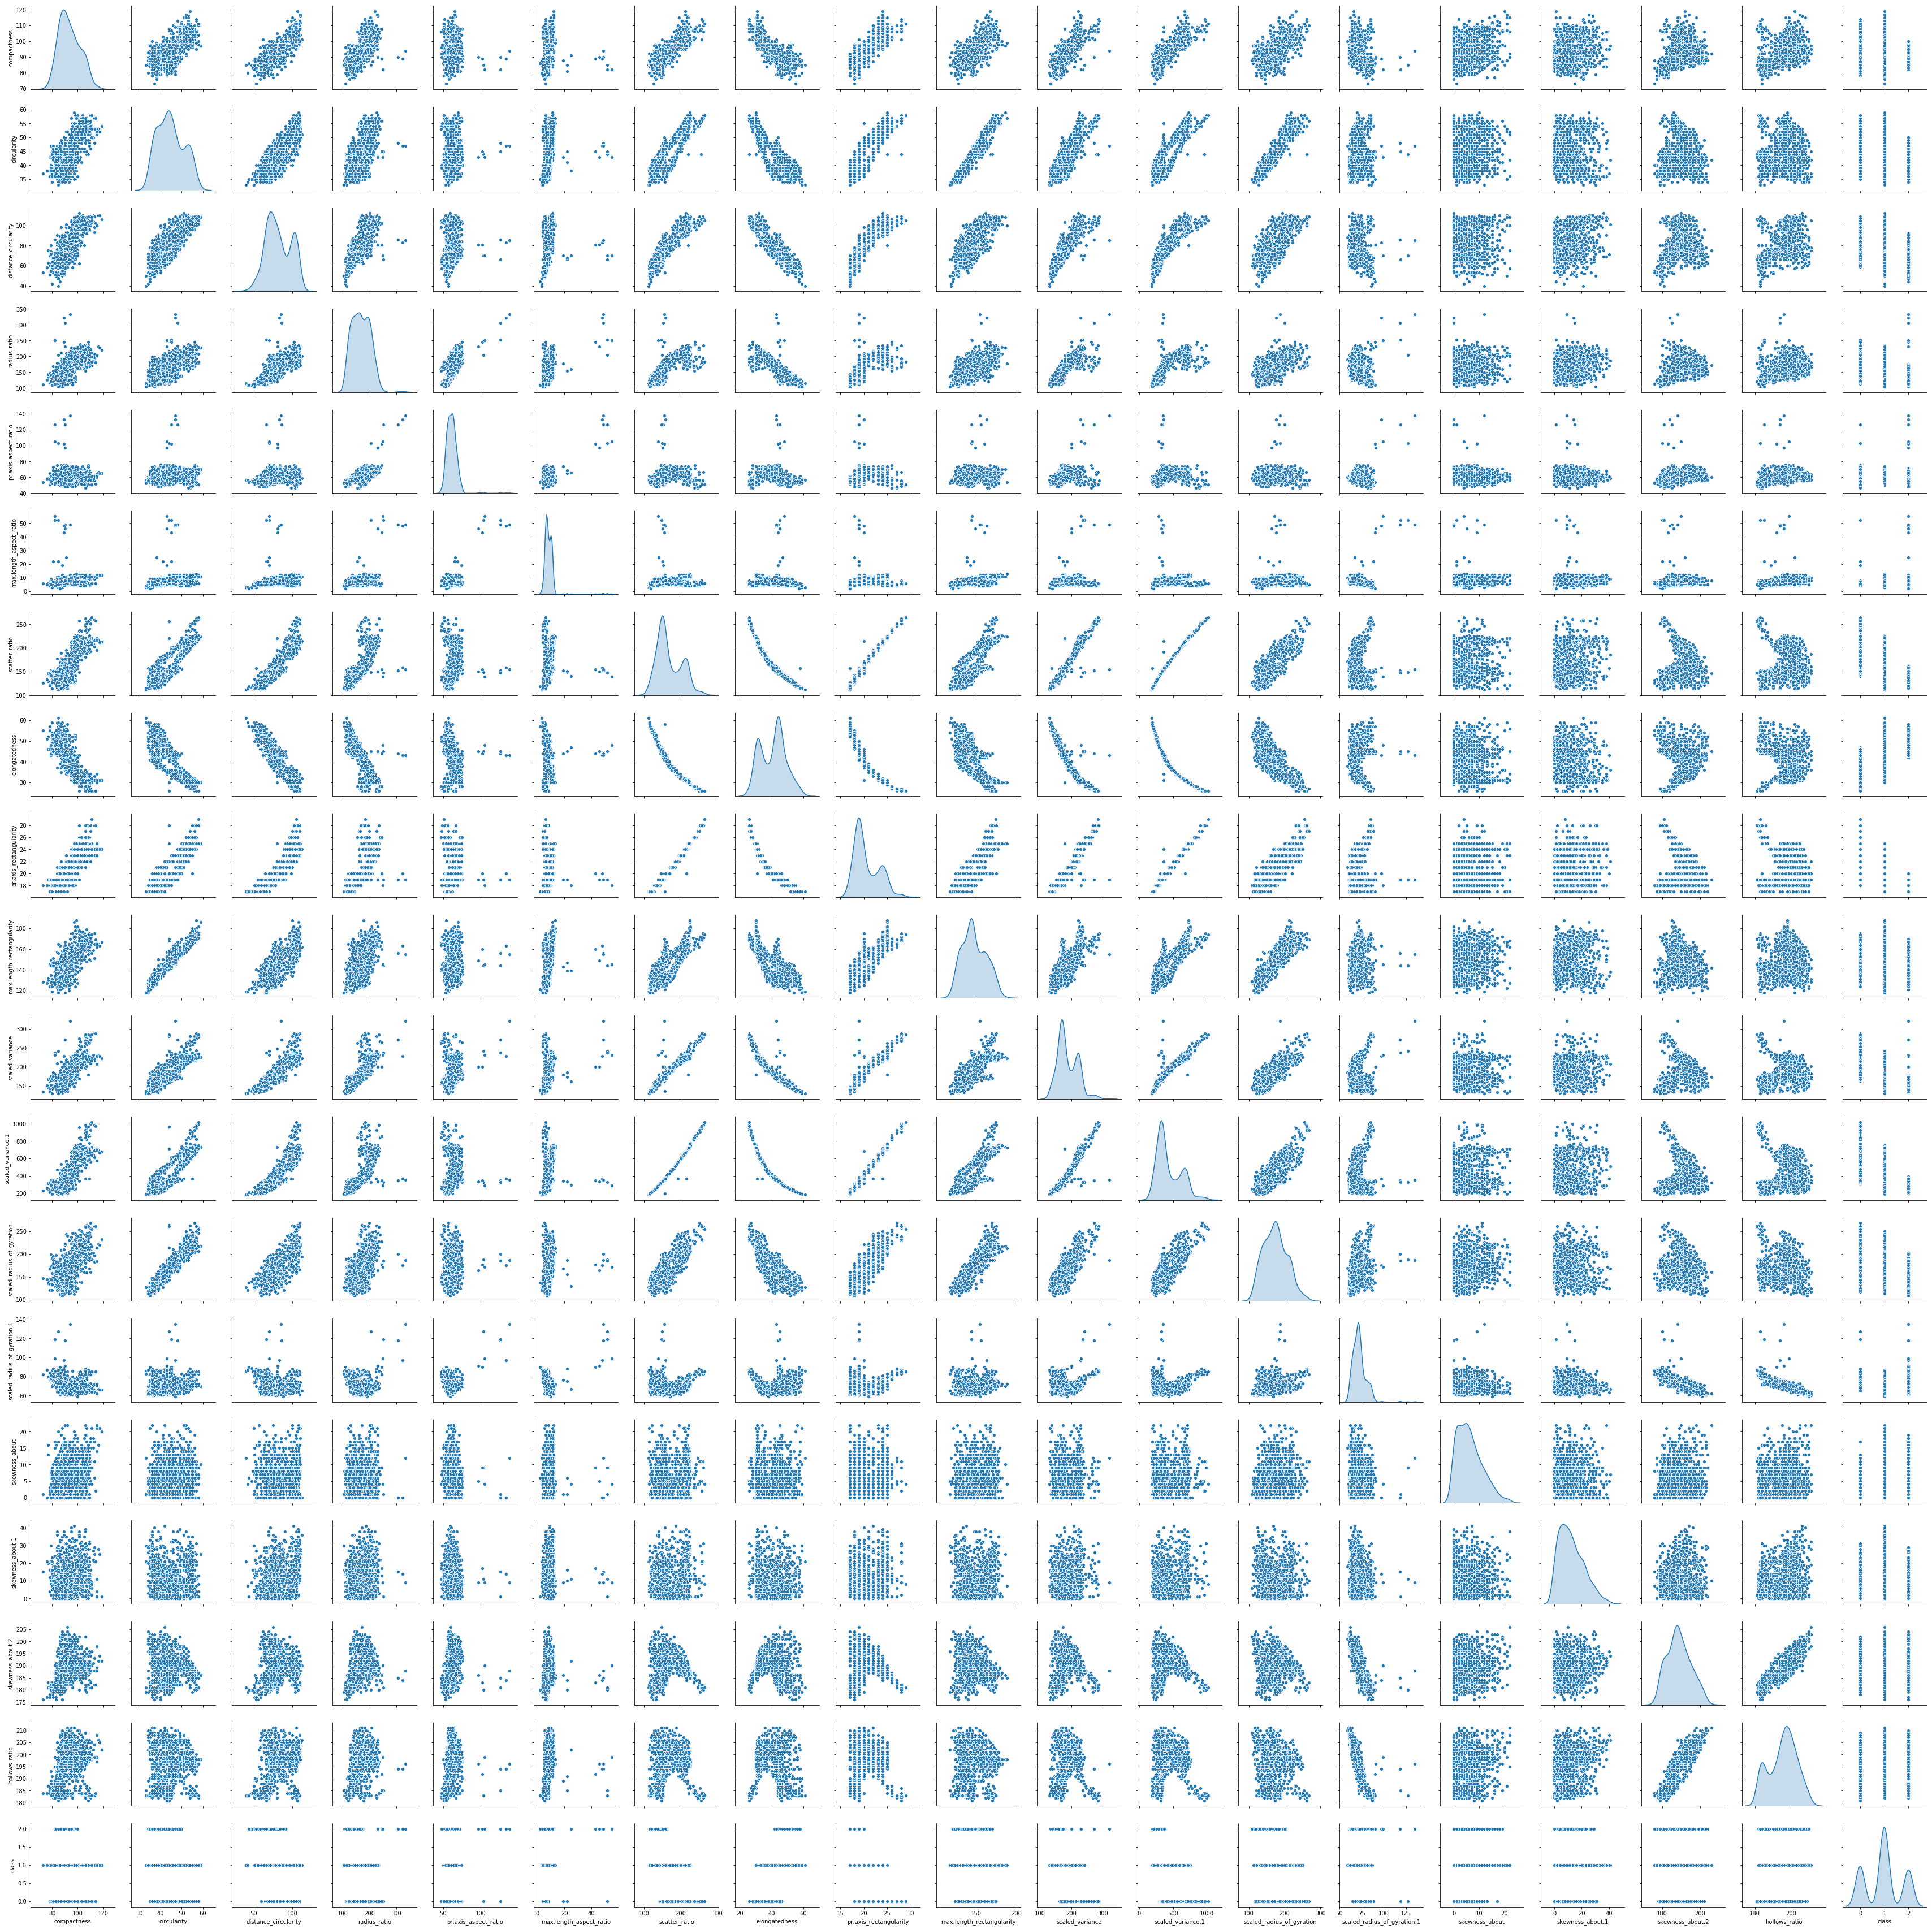

In [25]:
sns.pairplot(df1, diag_kind = 'kde')

#### We found a number of features to have dependencies on each other, we are removing a seven of them.

In [26]:
X_drop = df1.drop(['class','circularity','distance_circularity','scatter_ratio','elongatedness','max.length_aspect_ratio','scaled_variance','scaled_variance.1'], axis = 1)
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [27]:
X_std_drop = X.apply(zscore)
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [28]:
X_train, y_train, X_test, y_test = train_test_split(X_std_drop, y, test_size = 0.3, random_state = 11)

#### Applying SVM on the same

In [29]:
svm = SVC()
svm.fit(X_train, X_test)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Training Score

In [30]:
svm.score(X_train, X_test)

0.972972972972973

#### Testing Score

In [31]:
svm.score(y_train, y_test)

0.9645669291338582

In [32]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with dropped features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

#### Let's implement Principal Component Analysis to find out the important features through PCA.

In [33]:
pca = PCA(n_components = 18)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [35]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [36]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


#### Finding the important features

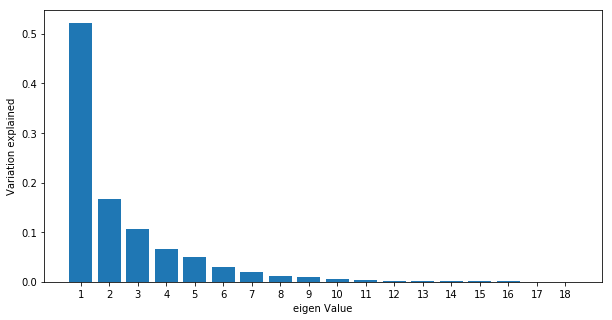

In [37]:
plt.figure(figsize = (10,5))
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,tick_label=range(1,19), align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Using the elbow method to find the number of components that explain more than 95% variance

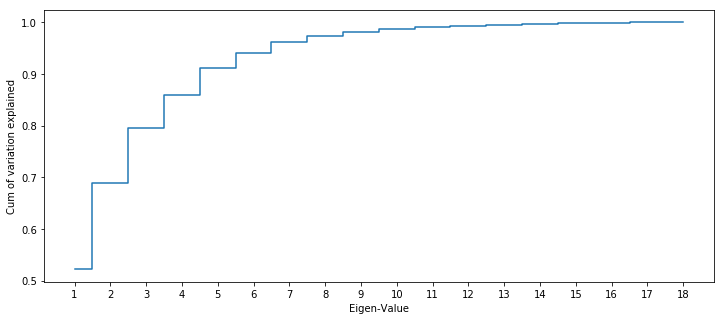

In [38]:
plt.figure(figsize = (12,5))
plt.xticks(np.arange(0,19))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen-Value')
plt.show()

#### From the elbow 8 components are enough to explain 95% of the variance

In [39]:
pca8 = PCA(n_components = 8)
pca8.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print(pca8.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [41]:
print(pca8.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501]


#### Using only those 8 important features to develop the model

In [42]:
Xpca8 = pca8.transform(X_std)

In [43]:
X_train, y_train, X_test, y_test = train_test_split(Xpca8, y, test_size = 0.3, random_state = 11)

In [44]:
svm = SVC()
svm.fit(X_train, X_test)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Training Score

In [45]:
svm.score(X_train, X_test)

0.9712837837837838

#### Testing Score

In [46]:
svm.score(y_train, y_test)

0.9488188976377953

In [47]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with PCA features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

#### Using Grid Search to find the best value of C and kernel for SVM

In [48]:
params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf'], 'gamma' :['auto']}

In [49]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

#### Printing out the best parameters

In [50]:
svm_gs.best_score_

0.9307432432432432

In [51]:
svm_gs.best_estimator_.C

1

In [52]:
svm_gs.best_estimator_.kernel

'rbf'

#### Training Score

In [53]:
svm_gs.score(X_train, X_test)

0.9712837837837838

#### Test Score

In [54]:
svm_gs.score(y_train, y_test)

0.9488188976377953

In [55]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with PCA features and GridSearch', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

#### Printing the model comparison dataframe

In [56]:
model_comparison

Model Type  Training Score  Test Score
0                 SVM Model with all features           97.30       96.46
1             SVM Model with dropped features           97.30       96.46
2                 SVM Model with PCA features           97.13       94.88
3  SVM Model with PCA features and GridSearch           97.13       94.88

#### Conclusion: By implementing PCA we have used only 8 components out of 18 input features with almost same accuracy in training and test data. We have removed all the dependencies between input features. This model might be performing better in production